## Table of contents

### 01. Importing Libraries
### 02. Importing Data 
### 03. Visualizations
### 04. Exporting visualizations 

# 01. Importing Libaries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [5]:
#creating a path 
path = r'C:\Users\canam\Achievement 4\Instacart Basket Analysis'

In [8]:
#importing the new data set with customer data created in Part 1
df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [10]:
#checking the output
df_ords_prods_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


In [12]:
#checking to see the shape of this imported file is the same as the exported one 
df_ords_prods_cust.shape

(32404859, 34)

# 03. Visualizations

### You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

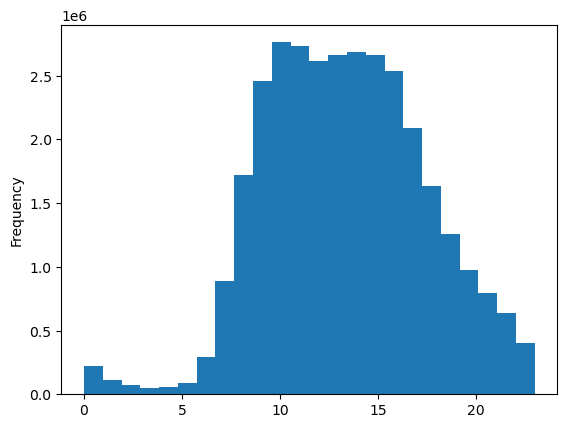

In [16]:
#creating a histogram of order_hour_of_day column
hist = df_ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

This histogram shows that the majority of orders are placed between 5 am and midnight.  Orders peak at around 10 am and begin to decrease at around 3 pm.  

### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

([<matplotlib.axis.XTick at 0x1d3d688ab10>,
 [Text(0, 0, 'Regular Customer:>10 & <=40 orders'),
  Text(1, 0, 'Loyal Customer:>40 orders'),
  Text(2, 0, 'New Customer:<10 orders')])

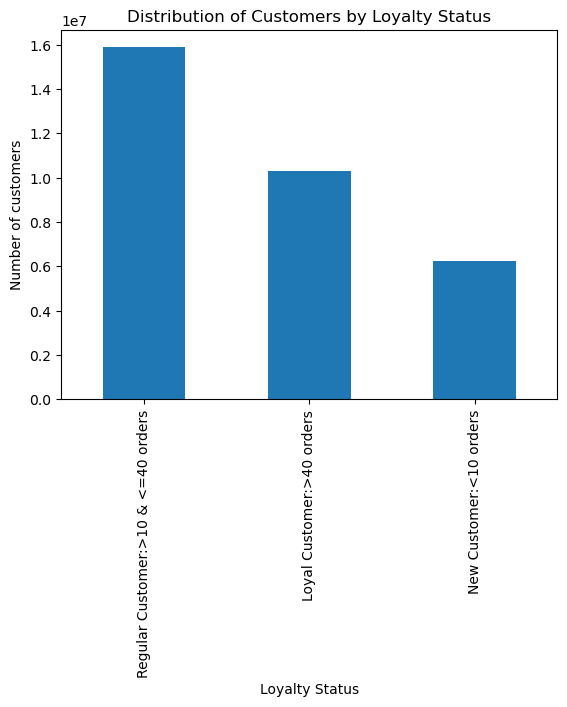

In [20]:
#creating a bar chart from the “loyalty_flag” column.
bar = df_ords_prods_cust['loyalty_flag'].value_counts().plot.bar()
plt.title('Distribution of Customers by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Number of customers')
plt.xticks(np.arange(3), ['Regular Customer:>10 & <=40 orders', 'Loyal Customer:>40 orders', 'New Customer:<10 orders'])

### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [23]:
#first, we must create a random sample for our line chart  
np.random.seed(4)

In [26]:
#Splitting the dataframe into two samples with a 70/30 split.
dev = np.random.rand(len(df_ords_prods_cust)) <= 0.7

In [28]:
#storing 70% of the sample in the big dataframe
big = df_ords_prods_cust[dev]

In [30]:
#storing 30% of the sample in the small dataframe

In [32]:
small = df_ords_prods_cust[~dev]

In [33]:
#checking to see if the rows in both samples add up to the same number of rows in the original dataframe
len(df_ords_prods_cust)

32404859

In [36]:
len(big) + len(small)

32404859

In [38]:
#creating a new data frame from small sample that only includes order_hour_of_day and prices
df_2 = small[['order_hour_of_day','prices']]

Text(0, 0.5, 'Average Price Spent')

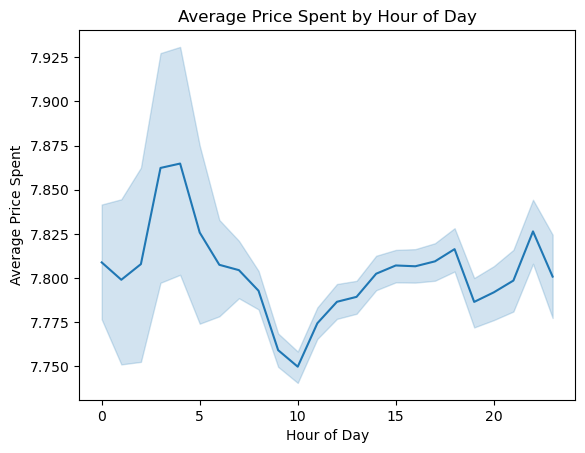

In [42]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')
plt.title('Average Price Spent by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price Spent')

### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.  
In a markdown cell beneath your line chart, describe what the line chart shows.

In [80]:
#creating a dataframe from small sample that only includes age and number_of_dependants
df_3 = small[['age','number_of_dependants']]

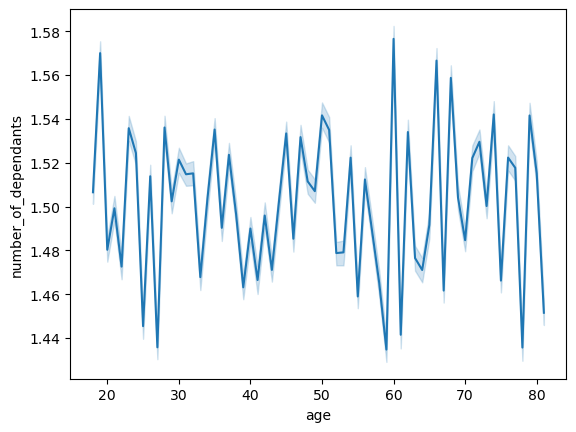

In [82]:
line_2 = sns.lineplot(data = df_3, x = 'age',y = 'number_of_dependants')

This line chart shows there is no correlation between age and number of dependants.

### You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.  
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

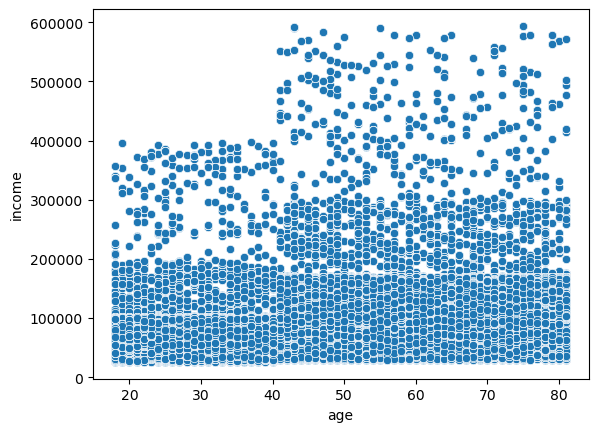

In [92]:
#explore whether there’s a connection between age and spending power (income). 
#create a scatterplot using the sns.scatterplot() function
scatter_plot = sns.scatterplot(x = 'age', y = 'income',data = df_ords_prods_cust)

This scatterplot shows that income stays relatively the same from age 20-40 and increases significantly at age 40.  

# 04.  Exporting visualizations

In [104]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Achievement 4 Task 9 Histogram'))

In [22]:
bar.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'Distribution of Customers by Loyalty Status')), bbox_inches='tight')

In [52]:
line.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'Average Price Spent by Hour of Day')), bbox_inches='tight')

In [110]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Achievement 4 Task 9 Line 2'))

In [113]:
scatter_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Achievement 4 Task 9 Scatterplot'))